# Special Libraries for Medical Imaging

## Pydicom

### Reading and Displaying DICOM Images:

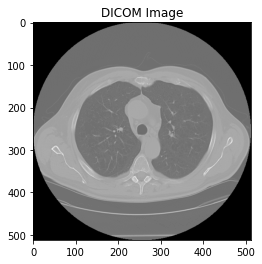

In [1]:
import pydicom
import matplotlib.pyplot as plt

# Load a DICOM image using PyDICOM
dcm = pydicom.dcmread('data/slice.dcm')

# Display the image using Matplotlib
plt.imshow(dcm.pixel_array, cmap='gray')
plt.title('DICOM Image')
plt.show()

### Extracting Metadata from DICOM Images:

In [3]:
import pydicom

# Load a DICOM image using PyDICOM
dcm = pydicom.dcmread('data/slice.dcm')

# Extract metadata from the image using PyDICOM
print(f"Patient ID: {dcm.PatientID}")
print(f"Study Date: {dcm.StudyDate}")
print(f"Modality: {dcm.Modality}")
print(f"Patient Name: {dcm.PatientName}")

Patient ID: R_004
Study Date: 19970630
Modality: CT
Patient Name: R_004


### Applying Windowing to DICOM Images:

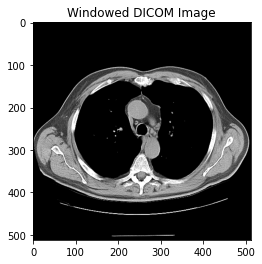

In [5]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Load a DICOM image using PyDICOM
dcm = pydicom.dcmread('data/slice.dcm')

# Apply windowing to the image using PyDICOM
image = dcm.pixel_array * dcm.RescaleSlope + dcm.RescaleIntercept
image = np.clip(image, -200, 200)

# Display the windowed image using Matplotlib
plt.imshow(image, cmap='gray')
plt.title('Windowed DICOM Image')
plt.show()

### Converting DICOM Images to Numpy Arrays:

In [ ]:
import pydicom
import numpy as np

# Load a DICOM image using PyDICOM
dcm = pydicom.dcmread('image.dcm')

# Convert the image to a Numpy array using PyDICOM
image = dcm.pixel_array

# Save the Numpy array as a binary file
np.save('image.npy', image)

# Load the Numpy array from the binary file
loaded_image = np.load('image.npy')

---------------------------------------------------------

## Nibabel

### Reading and Displaying NIfTI Images:

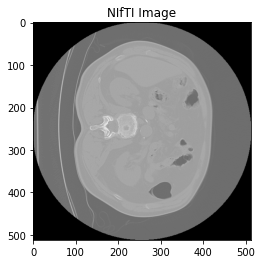

In [6]:
import nibabel as nib
import matplotlib.pyplot as plt

# Load a NIfTI image using Nibabel
nii = nib.load('data/patient1_after.nii.gz')

# Display the image using Matplotlib
plt.imshow(nii.get_fdata()[:,:,0], cmap='gray')
plt.title('NIfTI Image')
plt.show()

### Extracting Metadata from NIfTI Images:

In [12]:
import nibabel as nib

# Load a NIfTI image using Nibabel
nii = nib.load('data/patient1_after.nii.gz')

# Extract metadata from the image using Nibabel
print(f"Data shape: {nii.shape}")
print(f"Voxel size: {nii.header['pixdim']}")
print(f"Data type: {nii.get_fdata().dtype}")

Data shape: (512, 512, 68)
Voxel size: [-1.        0.830078  0.830078  5.        1.        1.        1.
  1.      ]
Data type: float64


### Applying Transformation Matrix to NIfTI Images:

In [10]:
import nibabel as nib
import numpy as np

# Load a NIfTI image using Nibabel
nii = nib.load('data/patient1_after.nii.gz')

# Define a transformation matrix for the image using Nibabel
affine = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

# Apply the transformation matrix to the image using Nibabel
nii.set_qform(affine)

# Save the transformed image using Nibabel
nib.save(nii, 'data/transformed_image.nii.gz')

---------------------------------------------------------

## Dicom2nifti

In [ ]:
import dicom2nifti

path_to_dicoms = 'path/to/dicom'
dicom2nifti.dicom_series_to_nifti(path_to_dicoms, 'path/to/output.nii.gz')

-----------------------------------------------------------------------------------

## SimpleITK

### Reading and Displaying DICOM Images:

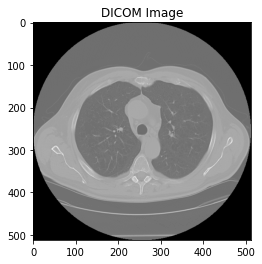

In [13]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Load a DICOM image using SimpleITK
dcm = sitk.ReadImage('data/slice.dcm')

# Convert the image to a Numpy array using SimpleITK
image = sitk.GetArrayFromImage(dcm)

# Display the image using Matplotlib
plt.imshow(image[0], cmap='gray')
plt.title('DICOM Image')
plt.show()

### Extracting Metadata from DICOM Images:

In [14]:
import SimpleITK as sitk

# Load a DICOM image using SimpleITK
dcm = sitk.ReadImage('data/slice.dcm')

# Extract metadata from the image using SimpleITK
print(f"Patient ID: {dcm.GetMetaData('0010|0020')}")
print(f"Study Date: {dcm.GetMetaData('0008|0020')}")
print(f"Modality: {dcm.GetMetaData('0008|0060')}")

Patient ID: R_004 
Study Date: 19970630
Modality: CT


### Applying Transformation to DICOM Images:

In [16]:
import SimpleITK as sitk

# Load a DICOM image using SimpleITK
dcm = sitk.ReadImage('data/slice.dcm')

# Define a transformation matrix for the image using SimpleITK
transform = sitk.AffineTransform(3)
transform.SetMatrix([1,0,0,0,1,0,0,0,1])

# Apply the transformation to the image using SimpleITK
transformed_image = sitk.Resample(dcm, transform)

# Save the transformed image using SimpleITK
sitk.WriteImage(transformed_image, 'data/transformed_image.dcm')

### Converting DICOM Images to Numpy Arrays:

In [ ]:
import SimpleITK as sitk
import numpy as np

# Load a DICOM image using SimpleITK
dcm = sitk.ReadImage('image.dcm')

# Convert the image to a Numpy array using SimpleITK
image = sitk.GetArrayFromImage(dcm)

# Save the Numpy array as a binary file
np.save('image.npy', image)

# Load the Numpy array from the binary file
loaded_image = np.load('image.npy')

### Applying Gaussian Smoothing to DICOM Images:

In [23]:
import SimpleITK as sitk

# Load a DICOM image using SimpleITK
dcm = sitk.ReadImage('data/slice.dcm')

# Apply Gaussian smoothing to the image using SimpleITK
smoothed_image = sitk.DiscreteGaussian(dcm, variance=0.1)

# Save the smoothed image using SimpleITK
sitk.WriteImage(smoothed_image, 'data/smoothed_image.dcm')

--------------------------------------

## Numpy-stl

### Reading and Displaying STL Models:

In [ ]:
from stl import mesh
import numpy as np
import matplotlib.pyplot as plt

# Load an STL model using numpy-stl
model = mesh.Mesh.from_file('model.stl')

# Convert the model to a Numpy array using numpy-stl
vertices = np.array(model.vectors)

# Display the model using Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for vertex in vertices:
    ax.plot_trisurf(vertex[:,0], vertex[:,1], vertex[:,2])
plt.title('STL Model')
plt.show()

### Creating and Saving STL Models:

In [ ]:
from stl import mesh
import numpy as np

# Define the vertices and faces of an STL model using numpy-stl
vertices = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])
faces = np.array([
    [0, 1, 2],
    [1, 3, 5],
    [3, 6, 5],
    [2, 7, 4],
    [0, 2, 4],
    [1, 5, 7],
    [7, 6, 5],
    [2, 1, 7],
    [0, 4, 3],
    [3, 4, 6],
    [2, 1, 0],
    [7, 5, 3]
])
model = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, face in enumerate(faces):
    for j, vertex in enumerate(face):
        model.vectors[i][j] = vertices[vertex]

# Save the model as an STL file using numpy-stl
model.save('new_model.stl')

### Applying Transformation to STL Models:

In [ ]:
from stl import mesh
import numpy as np

# Load an STL model using numpy-stl
model = mesh.Mesh.from_file('model.stl')

# Define a transformation matrix for the model using numpy-stl
transformation = np.array([
    [1, 0, 0, 10],
    [0, 1, 0, 10],
    [0, 0, 1, 10],
    [0, 0, 0, 1]
])

# Apply the transformation matrix to the model using numpy-stl
model.apply_transform(transformation)

# Save the transformed model as an STL file using numpy-stl
model.save('transformed_model.stl')

### Convert Nifti Files into STL Files

In [ ]:
import nibabel as nib
import numpy as np
from stl import mesh
from skimage import measure

# Path to the nifti file (.nii, .nii.gz)
file_path = 'segmentation.nii'

# Extract the numpy array
nifti_file = nib.load(file_path)
np_array = nifti_file.get_fdata()

verts, faces, normals, values = measure.marching_cubes(np_array, 0)
obj_3d = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))

for i, f in enumerate(faces):
    obj_3d.vectors[i] = verts[f]

# Save the STL file with the name and the path
obj_3d.save('segmentation.stl')

----------------------------------------------------------------

## Scikit-image

--------------------------------------------------------------

## ITK

### Reading and Displaying Images:

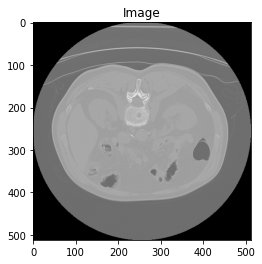

In [36]:
import itk
import matplotlib.pyplot as plt

# Load an image using ITK
image = itk.imread('data/patient1_after.nii.gz')

# Convert the image to a Numpy array using ITK
array = itk.array_view_from_image(image)

# Display the image using Matplotlib
plt.imshow(array[0], cmap='gray')
plt.title('Image')
plt.show()

### Smoothing Nifti files

In [ ]:
import itk

# Load an image
input_image = itk.imread("input_image.nii.gz") # or input_image.nii

# Apply a filter
smoothed_image = itk.median_image_filter(input_image, radius=2) # More you increase the `radius` more the image will be smooth

#Save the result
itk.imwrite(smoothed_image, "output_image.nii.gz") # or output_image.nii 